In [1]:
from sklearn.preprocessing import MinMaxScaler

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Veri setini yükleme ve hazırlama
df = pd.read_excel("rainfall-and-daily-consumption-data-on-istanbul-dams.xlsx")
df = df[['Tarih', 'İstanbul günlük tüketim(m³/gün)']]
df = df.set_index("Tarih")
df.index = pd.to_datetime(df.index)
df['İstanbul günlük tüketim(m³/gün)'] = df['İstanbul günlük tüketim(m³/gün)'] // 100
df['İstanbul günlük tüketim(m³/gün)'] = df['İstanbul günlük tüketim(m³/gün)'].astype(float)
df = np.log(df)

# Eğitim ve test setlerini oluşturma
train_size = int(len(df) * 0.80)
test_size = len(df) - train_size
train, test = df[0:train_size], df[train_size:len(df)]

# AR modelini oluşturma
lag = 1  # Lag değeri (önceki adımların sayısı)
ar_model = AutoReg(train['İstanbul günlük tüketim(m³/gün)'], lags=lag)
ar_model_fit = ar_model.fit()
print(ar_model_fit.summary())

# Test seti üzerinde tahmin yapma
predictions = ar_model_fit.predict(start=test.index[0], end=test.index[-1])

# Hataları hesaplama
mse = mean_squared_error(test['İstanbul günlük tüketim(m³/gün)'], predictions)
print("Mean Squared Error (MSE): {:.4f}".format(mse))

rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE): {:.4f}".format(rmse))

mae = mean_absolute_error(test['İstanbul günlük tüketim(m³/gün)'], predictions)
print("Mean Absolute Error (MAE): {:.4f}".format(mae))

mape = mean_absolute_percentage_error(test['İstanbul günlük tüketim(m³/gün)'], predictions)
print("Mean Absolute Percentage Error (MAPE): {:.4f}".format(mape*100))



                                   AutoReg Model Results                                   
Dep. Variable:     İstanbul günlük tüketim(m³/gün)   No. Observations:                 3771
Model:                                  AutoReg(1)   Log Likelihood                7775.609
Method:                            Conditional MLE   S.D. of innovations              0.031
Date:                             Sun, 02 Jun 2024   AIC                         -15545.219
Time:                                     16:06:32   BIC                         -15526.514
Sample:                                 01-02-2011   HQIC                        -15538.569
                                      - 04-28-2021                                         
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4569      0.049  

C:\Users\DOGUKAN\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\DOGUKAN\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [3]:
predictions

2021-04-29    10.206769
2021-04-30    10.205708
2021-05-01    10.204695
2021-05-02    10.203727
2021-05-03    10.202803
                ...    
2023-11-23    10.183130
2023-11-24    10.183130
2023-11-25    10.183130
2023-11-26    10.183130
2023-11-27    10.183130
Freq: D, Length: 943, dtype: float64

In [4]:
pred7=predictions

In [5]:
len(pred7)

943

In [6]:
pred7=np.array(pred7)

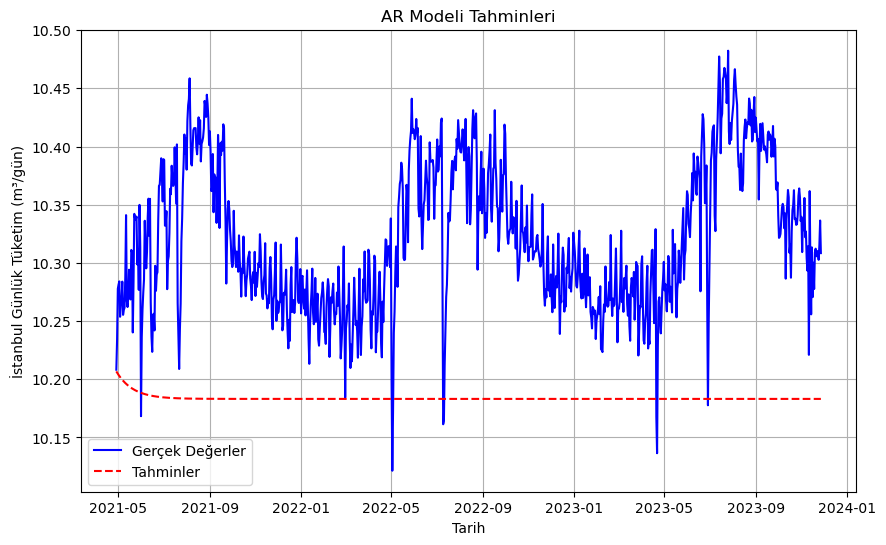

In [7]:
# Tahmin ve gerçek değerleri içeren bir DataFrame oluşturma
results = pd.DataFrame(index=test.index)
results['Gerçek'] = test['İstanbul günlük tüketim(m³/gün)']
results['Tahmin'] = predictions

# Görselleştirme
plt.figure(figsize=(10, 6))
plt.plot(results.index, results['Gerçek'], label='Gerçek Değerler', color='blue')
plt.plot(results.index, results['Tahmin'], label='Tahminler', color='red', linestyle='--')
plt.title('AR Modeli Tahminleri')
plt.xlabel('Tarih')
plt.ylabel('İstanbul Günlük Tüketim (m³/gün)')
plt.legend()
plt.grid(True)
plt.show()
